In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#scikit-learn import
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [25]:
startup_df=pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/50_Startups.csv',)
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [26]:
startup_df.isnull().sum()
startup_df.info()
startup_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

 # Check dependency of profit on numerical columns


 - correlation graph
- R&D Spend vs Profit
- Administration vs Profit
 - Marketing Spend vs Profit
# correlation matrix
- R&D Spend
- Administration
- Marketing Spend
- Profit

 

In [27]:
import seaborn as sns


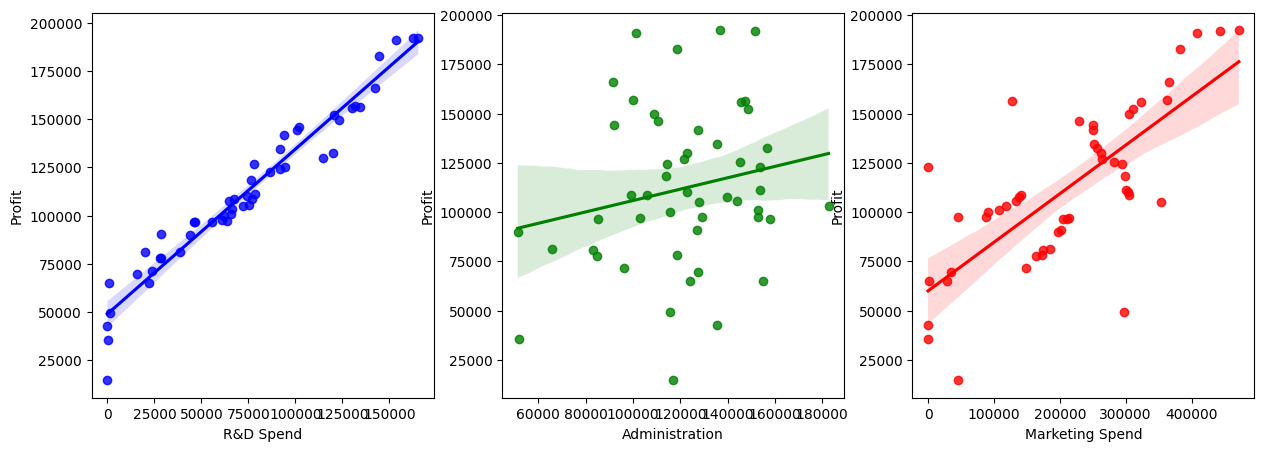

In [28]:
ig, axs = plt.subplots(ncols=3, figsize=(15, 5))
sns.regplot(data=startup_df, x='R&D Spend', y='Profit', color='b', ax=axs[0])
sns.regplot(data=startup_df, x='Administration', y='Profit', color='g', ax=axs[1])
sns.regplot(data=startup_df, x='Marketing Spend', y='Profit', color='r', ax=axs[2])
plt.show()

Rule for pearson correlation coefficient:

- If r is greater than 0, then there is a positive linear relationship.
- If r is less than 0, then there is a negative linear relationship.
- If r is equal to 0, then there is no linear relationship.
- The stronger the linear relationship the closer r is to either +1 or -1.
- The weaker the linear relationship the closer r is to 0.
- The Pearson correlation coefficient only measures linear relationships. It may indicate that there is a strong nonlinear relationship between two variables that is not   captured by the Pearson correlation coefficient.

<Axes: >

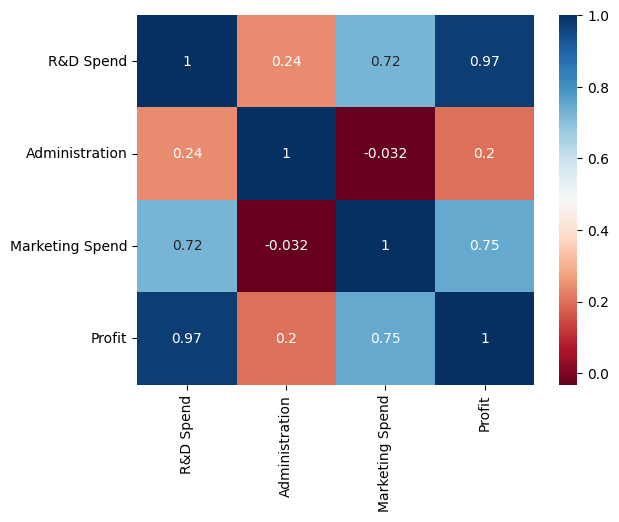

In [29]:
corr=startup_df.drop(columns='State').corr()
sns.heatmap(corr,annot=True,cmap='RdBu')

 # correlation for categorical data

 - boxplot

<Axes: xlabel='State', ylabel='Profit'>

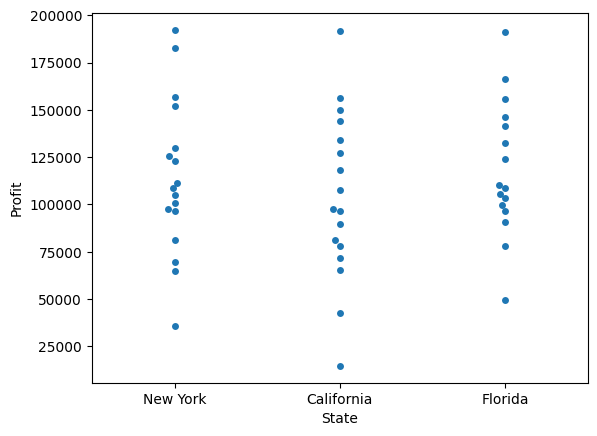

In [30]:
sns.swarmplot(data=startup_df, x='State', y='Profit')

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X = startup_df[['Marketing Spend','R&D Spend', 'State']]
y = startup_df['Profit']
X.head()

,Marketing Spend,R&D Spend,State
0,471784.10,165349.20,New York
1,443898.53,162597.70,California
2,407934.54,153441.51,Florida
3,383199.62,144372.41,New York
4,366168.42,142107.34,Florida


In [33]:
enc = OneHotEncoder(drop='first', sparse_output=False)
dummy_states = enc.fit_transform(X[['State']])
X = pd.concat([X, pd.DataFrame(dummy_states, columns=['0','1'])], axis=1)
X.drop(columns=['State'], inplace=True)
X.head()

,Marketing Spend,R&D Spend,0,1
0,471784.10,165349.20,0.0,1.0
1,443898.53,162597.70,0.0,0.0
2,407934.54,153441.51,1.0,0.0
3,383199.62,144372.41,0.0,1.0
4,366168.42,142107.34,1.0,0.0


In [34]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=0)

In [35]:
reg=LinearRegression()
reg.fit(Xtrain,ytrain)

LinearRegression()

In [38]:
ypred = reg.predict(Xtest)
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)
print("MAE: ", mae)
print("MSE: ", mse)
print("R2: ", r2)

MAE:  6216.591981183663
MSE:  57796739.97958307
R2:  0.9464245777553181


In [39]:
enc.transform([['Florida']])

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [40]:
x = pd.DataFrame({
    'Marketing Spend': [136897.8,2000000],
    'R&D Spend': [165349.2, 2000000],
    '0': [0, 0],
    '1': [1, 0],
})
x

,Marketing Spend,R&D Spend,0,1
0,136897.8,165349.2,0,1
1,2000000.0,2000000.0,0,0


In [41]:
reg.predict(x)

array([ 181930.23294906, 1697955.6913355 ])